C:\Users\18\AppData\Local\Temp\ipykernel_16512\2113039829.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Sex', 'AgeGroup'])['Survived'].agg(['sum', 'count'])


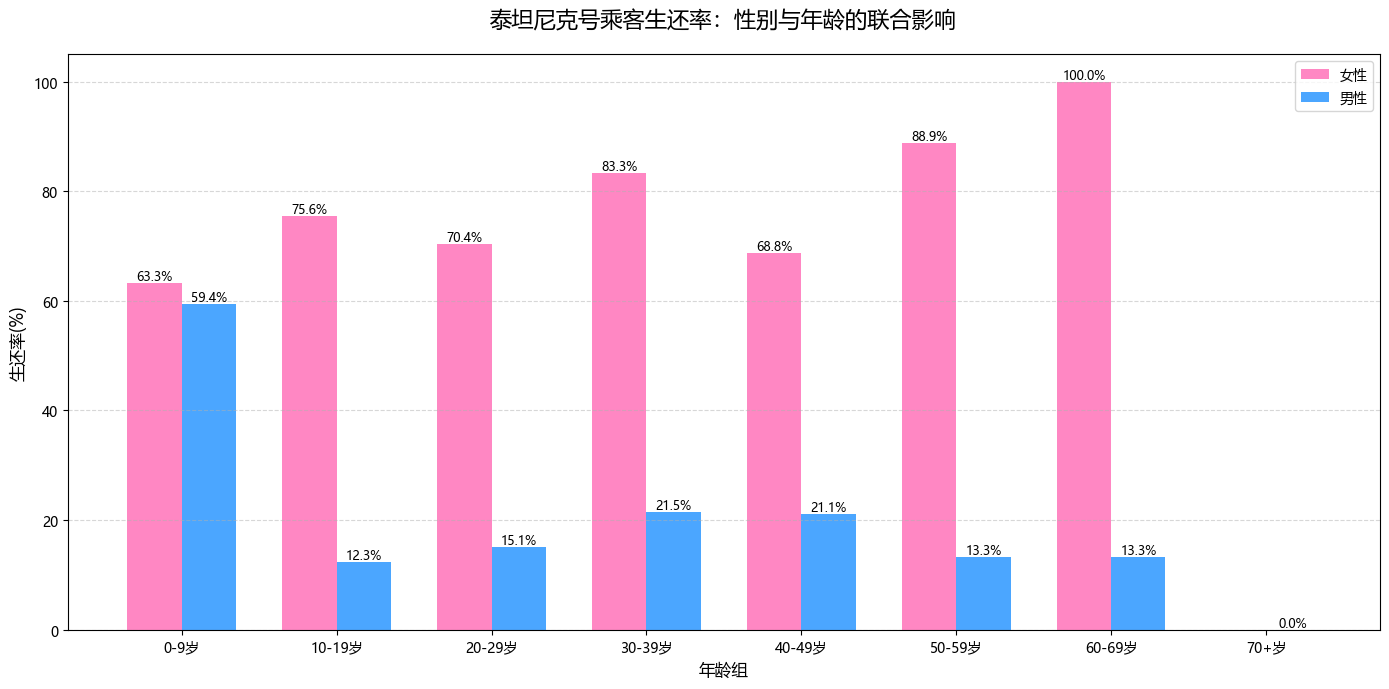


性别-年龄段生还情况统计:
       Sex AgeGroup  sum  count  survival_rate
0   female     0-9岁   19     30      63.333333
1   female   10-19岁   34     45      75.555556
2   female   20-29岁   88    125      70.400000
3   female   30-39岁   50     60      83.333333
4   female   40-49岁   22     32      68.750000
5   female   50-59岁   16     18      88.888889
6   female   60-69岁    4      4     100.000000
7   female     70+岁    0      0            NaN
8     male     0-9岁   19     32      59.375000
9     male   10-19岁    7     57      12.280702
10    male   20-29岁   41    272      15.073529
11    male   30-39岁   23    107      21.495327
12    male   40-49岁   12     57      21.052632
13    male   50-59岁    4     30      13.333333
14    male   60-69岁    2     15      13.333333
15    male     70+岁    0      6       0.000000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('train.csv')

# 处理缺失的年龄数据（用中位数填充）
df['Age'] = df['Age'].fillna(df['Age'].median())

# 将年龄分组（每10岁一组）
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9岁', '10-19岁', '20-29岁', '30-39岁', '40-49岁', '50-59岁', '60-69岁', '70+岁']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 计算各性别-年龄组的生还率
grouped = df.groupby(['Sex', 'AgeGroup'])['Survived'].agg(['sum', 'count'])
grouped['survival_rate'] = grouped['sum'] / grouped['count'] * 100

# 重置索引以便绘图
grouped = grouped.reset_index()

# 创建图表
plt.figure(figsize=(14, 7))

# 设置柱状图位置
x = np.arange(len(labels))
width = 0.35

# 绘制女性生还率
female_data = grouped[grouped['Sex'] == 'female']
bars_female = plt.bar(x - width/2, female_data['survival_rate'], width,
                     label='女性', color='#FF69B4', alpha=0.8)

# 绘制男性生还率
male_data = grouped[grouped['Sex'] == 'male']
bars_male = plt.bar(x + width/2, male_data['survival_rate'], width,
                   label='男性', color='#1E90FF', alpha=0.8)

# 添加数据标签
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

add_labels(bars_female)
add_labels(bars_male)

# 添加标题和标签
plt.title('泰坦尼克号乘客生还率：性别与年龄的联合影响', fontsize=16, pad=20)
plt.xlabel('年龄组', fontsize=12)
plt.ylabel('生还率(%)', fontsize=12)
plt.xticks(x, labels)
plt.legend(loc='upper right')

# 添加网格线
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 显示图表
plt.tight_layout()
plt.show()

# 打印详细数据
print("\n性别-年龄段生还情况统计:")
print(grouped[['Sex', 'AgeGroup', 'sum', 'count', 'survival_rate']])